In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

## Linear Regression Log transformation of Rating Count and Rating as Predicting Variable

In [2]:
%store -r Recipes_df_new

In [3]:
Recipes_df_new.head()

Rating  Prep_Time  Cook_Time  Yield  RatingCount  Calories  Protein(gms)  \
0    3.85       15.0       60.0     12         33.0     300.0           5.1   
1    4.02       15.0       30.0      4         47.0     622.0          21.4   
2    4.50       15.0       45.0      6          2.0     229.0          14.1   
3    4.13       15.0       35.0      6         23.0     234.0           7.7   
4    4.50       15.0        2.0      4          2.0     531.0           9.6   

   Carbs(gms)  fat(gms)  cholestrol(gms)  sodium(gms)  Weighted_review  
0        49.8       9.9           0.0513       0.5890           127.05  
1        43.7      41.6           0.0106       1.3319           188.94  
2        31.2       5.4           0.0203       1.2197             9.00  
3        43.6       3.4           0.0310       0.2318            94.99  
4        28.8      42.7           0.1499       0.2309             9.00

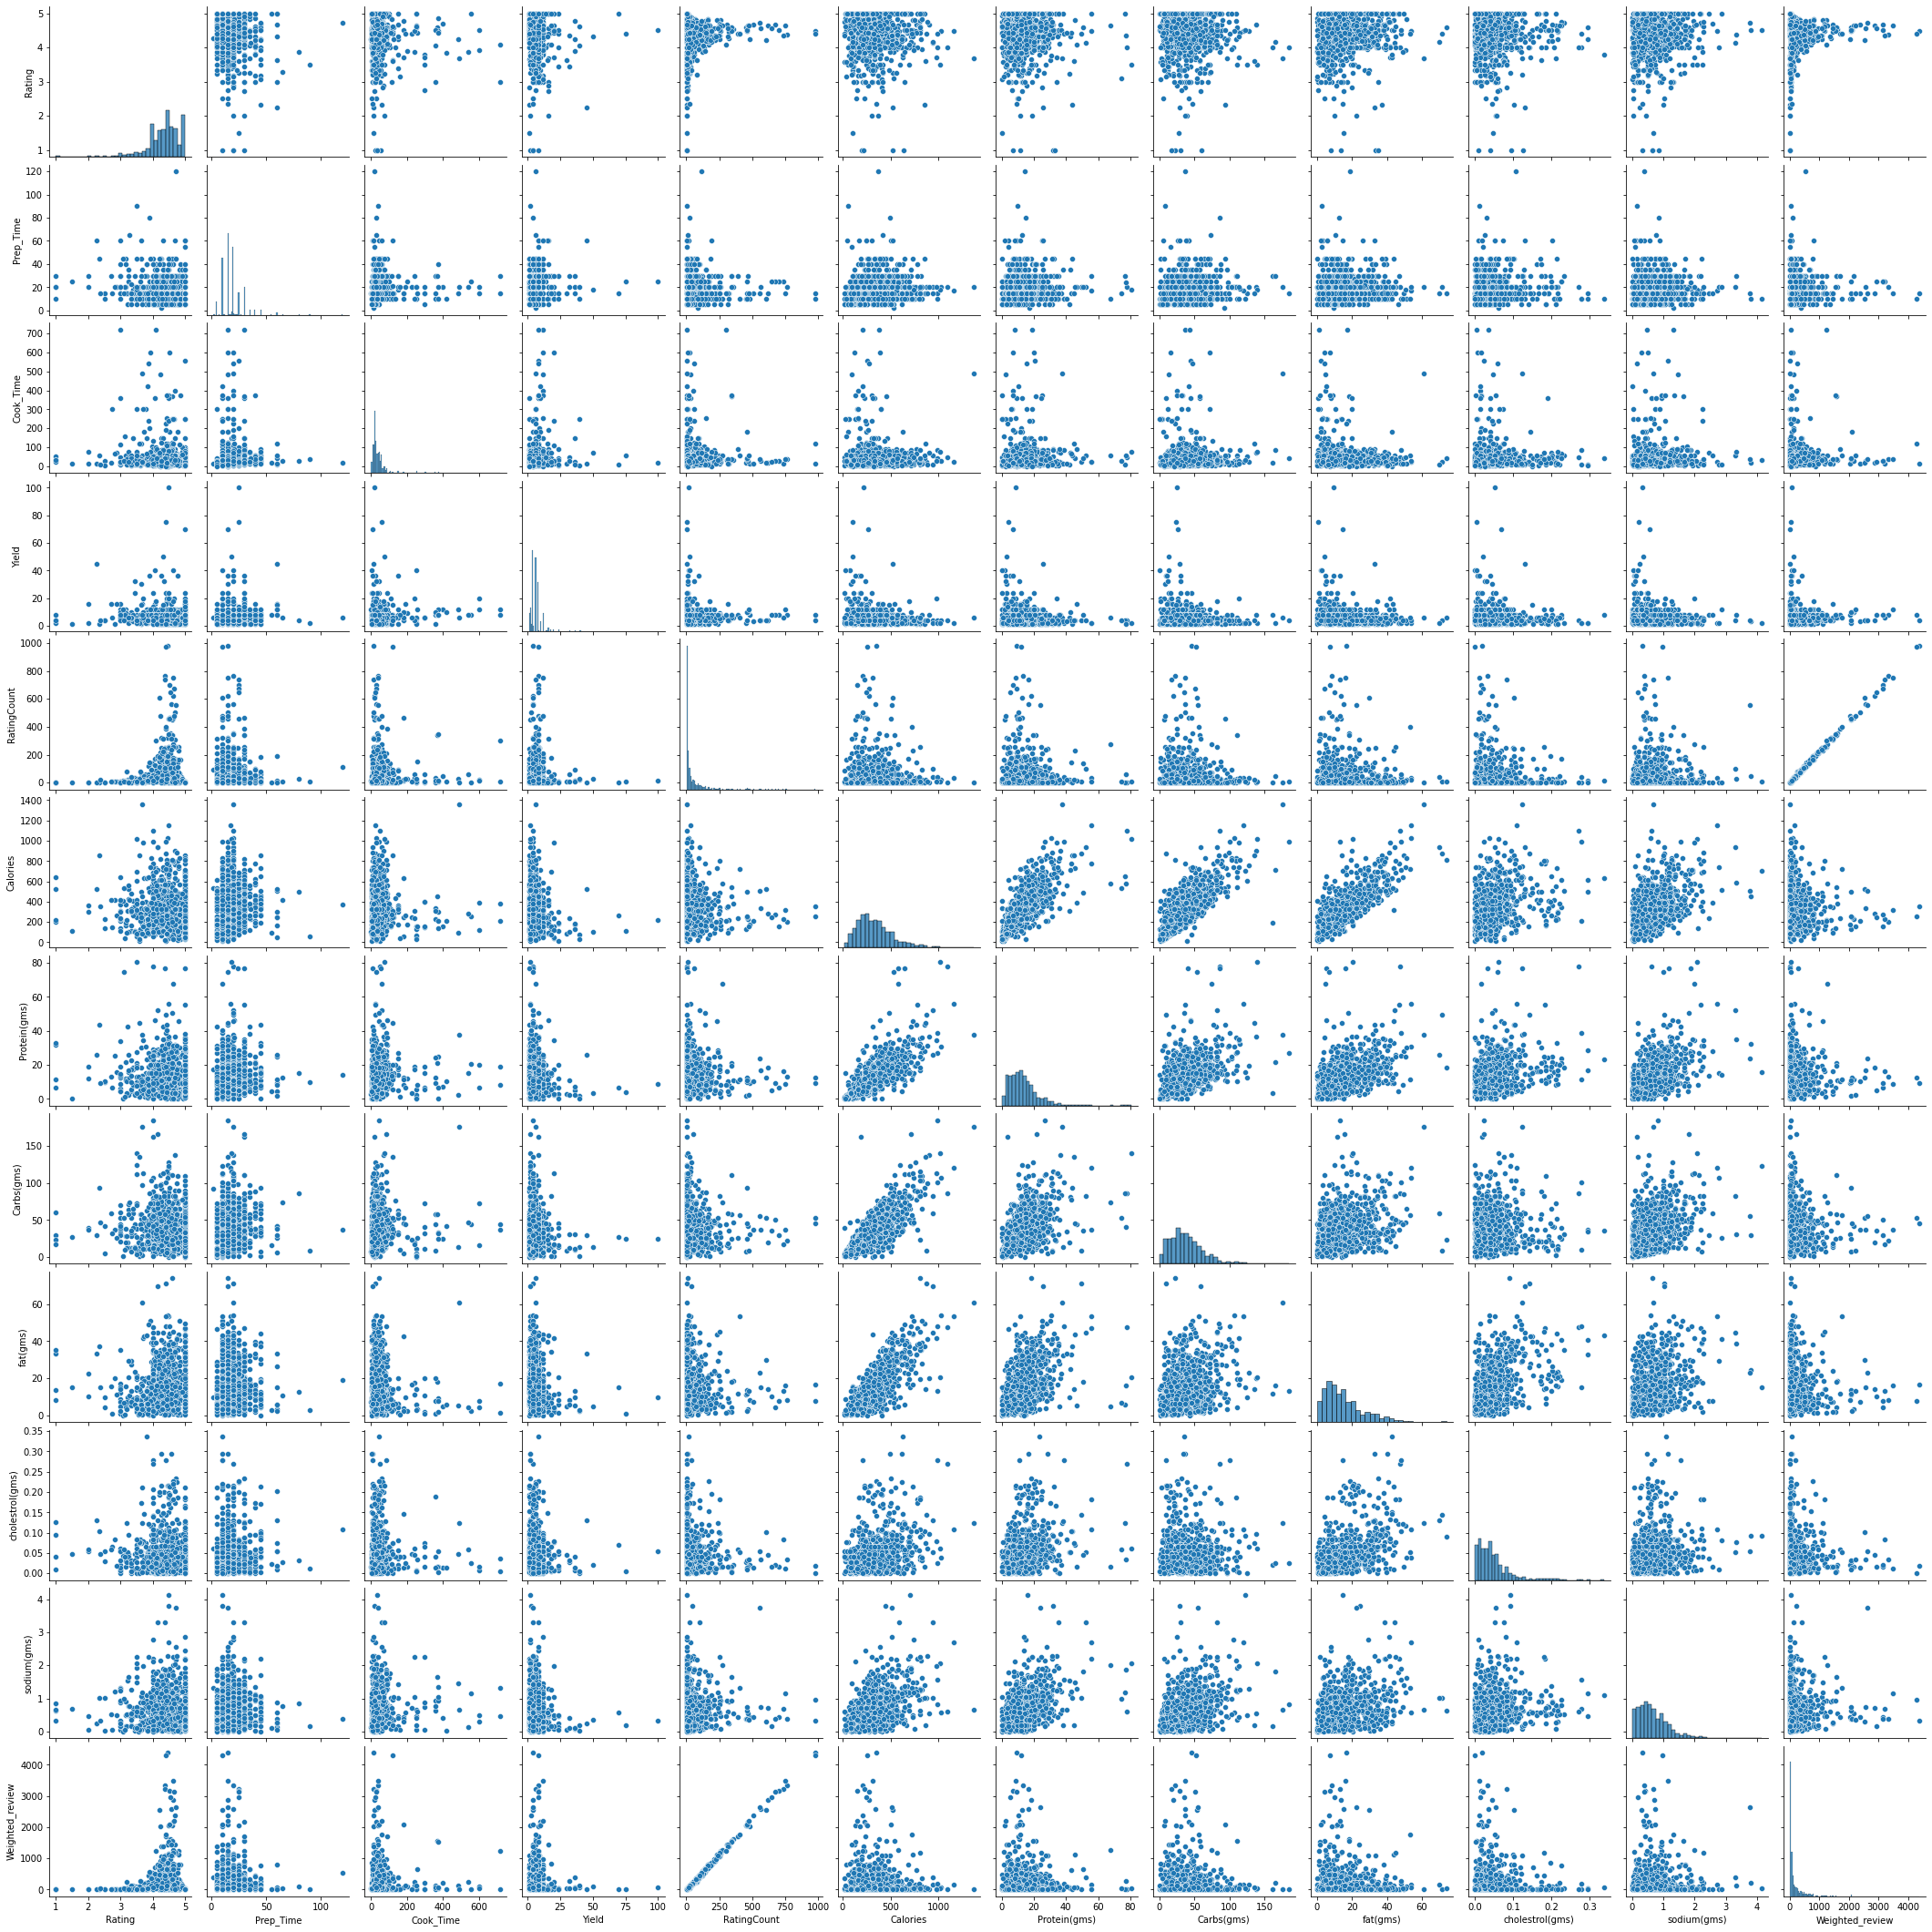

In [4]:
sns.pairplot(Recipes_df_new);


''' Looks like some log transformations are needed. Transforming Rating and Rating Count to spread the variables'''

In [5]:
Recipes_df_log = Recipes_df_new

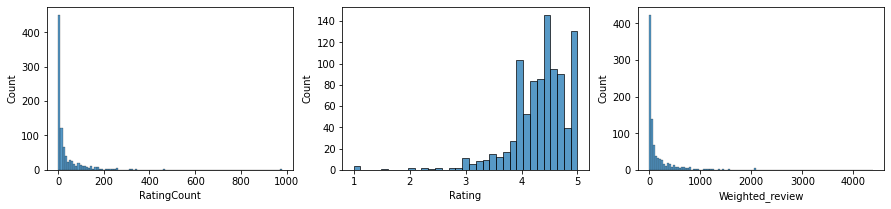

<Figure size 432x288 with 0 Axes>

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,figsize=(15,3))
sns.histplot(Recipes_df_new['RatingCount'], ax = ax1)
sns.histplot(Recipes_df_new['Rating'], ax = ax2)
sns.histplot(Recipes_df_new['Weighted_review'], ax = ax3)
fig = plt.figure();

In [7]:
# Log Transformation

In [8]:
Recipes_df_log['RatingCount_log'] = np.log(Recipes_df_log['RatingCount'])
Recipes_df_log['Rating_log'] = np.log(Recipes_df_log['Rating'])
Recipes_df_log['Weighted_review_log'] = np.log(Recipes_df_log['Weighted_review'])

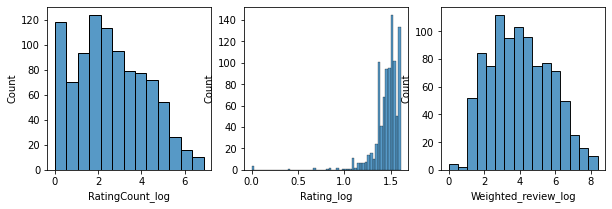

<Figure size 432x288 with 0 Axes>

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(10,3))
sns.histplot(Recipes_df_new['RatingCount_log'], ax = ax1)
sns.histplot(Recipes_df_new['Rating_log'], ax = ax2)
sns.histplot(Recipes_df_new['Weighted_review_log'], ax = ax3)
fig = plt.figure();

In [10]:
## Boxcox Transformation

In [11]:
from scipy import stats


-0.06576536768164803
3.8430417996415063
-0.05528381836151315


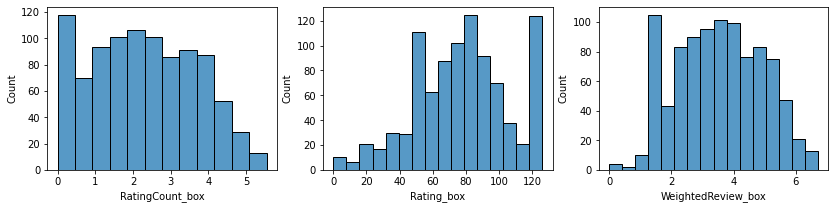

<Figure size 432x288 with 0 Axes>

In [12]:
Recipes_df_log['RatingCount_box'], lamb= stats.boxcox(Recipes_df_log.RatingCount)
print(lamb)
Recipes_df_log['Rating_box'], lamb = stats.boxcox(Recipes_df_log.Rating)
print(lamb)
Recipes_df_log['WeightedReview_box'], lamb = stats.boxcox(Recipes_df_log.Weighted_review)
print(lamb)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,figsize=(14,3))
sns.histplot(Recipes_df_new['RatingCount_box'], ax = ax1)
sns.histplot(Recipes_df_new['Rating_box'], ax = ax2)
sns.histplot(Recipes_df_new['WeightedReview_box'], ax = ax3)
fig = plt.figure();

Recipes_df_log = Recipes_df_log.drop(['RatingCount_log', 'Rating_log', 'Rating', 'RatingCount', 'Weighted_review'], axis = 1)

<AxesSubplot:>

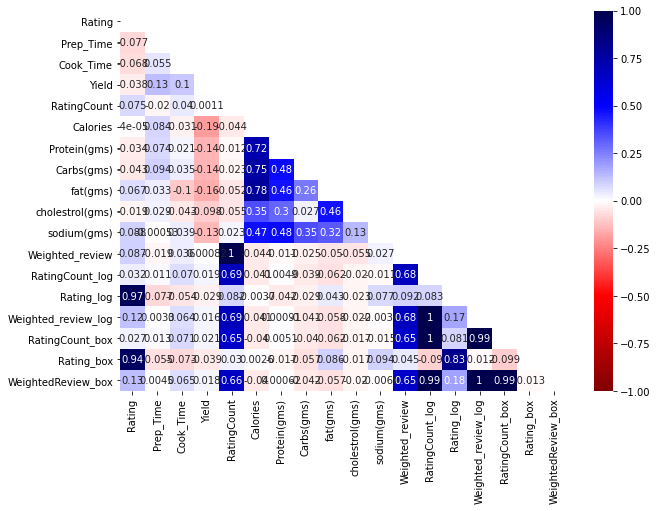

In [13]:
upper = np.triu(Recipes_df_log.corr()) 
plt.figure(figsize=(10, 7))
sns.heatmap(Recipes_df_log.corr(), cmap="seismic_r", annot=True, vmin=-1, vmax=1, mask=upper)

In [14]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
def vif(df_X):
    '''
    Calculate the VIF for each feature of df_X (a Pandas DataFrame).
    '''
    vif_data = [variance_inflation_factor(df_X.values, i)
                for i in range(df_X.shape[1])]
    
    return pd.Series(vif_data, index=df_X.columns)

In [16]:
vif(Recipes_df_new.iloc[:, :11])

Rating               8.765123
Prep_Time            4.442784
Cook_Time            1.487224
Yield                2.137520
RatingCount          1.238880
Calories           128.544562
Protein(gms)         9.529572
Carbs(gms)          30.919932
fat(gms)            28.317809
cholestrol(gms)      2.788903
sodium(gms)          3.686360
dtype: float64

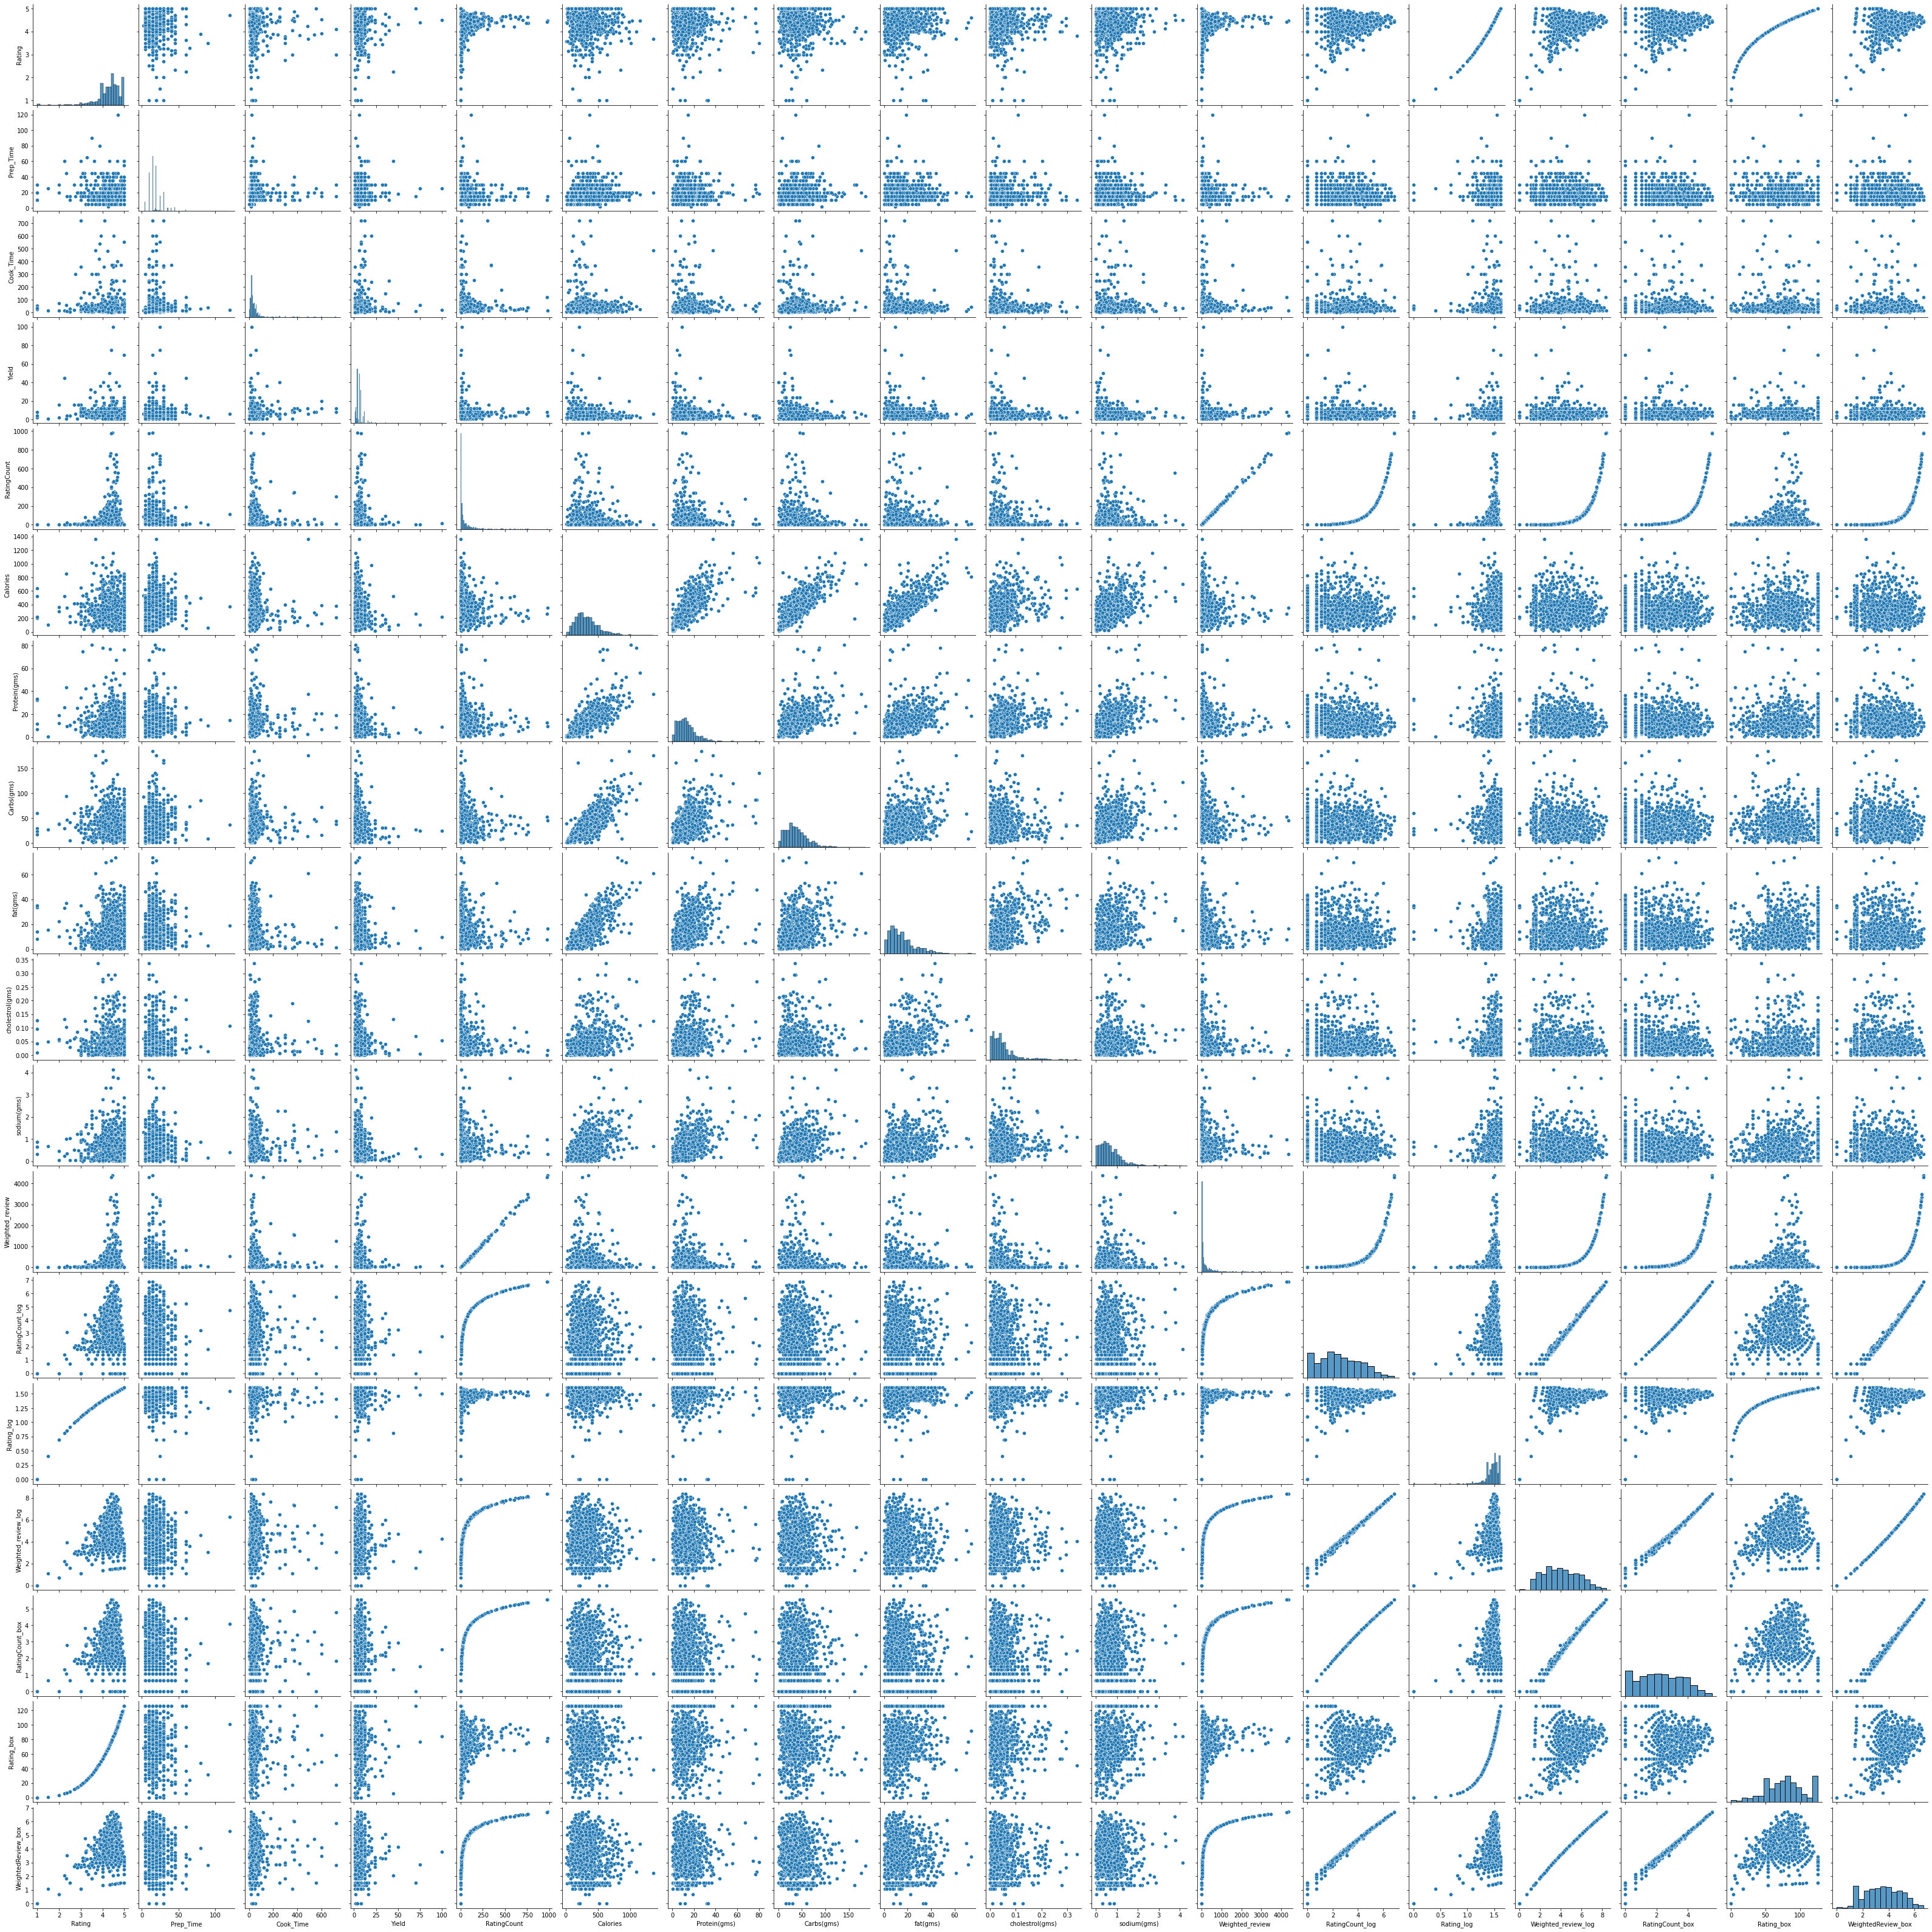

In [17]:
sns.pairplot(Recipes_df_log);

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create an empty model
lm = LinearRegression()

In [19]:
X = Recipes_df_new [['Prep_Time', 'Cook_Time', 'Yield', 'RatingCount',
                    'Protein(gms)', 'Carbs(gms)','fat(gms)', 
                     'cholestrol(gms)', 'sodium(gms)' ]] # Without calories based on VIF

# Target
y = Recipes_df_new['Rating_box']

In [20]:
#Split the data 80 - 20 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state = 42)


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [22]:
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [23]:
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [24]:
# Fit  
lm.fit(X_tr, y_train)

LinearRegression()

In [25]:
lm.score(X_tr, y_train)

0.03633804498805526

In [26]:
lm.score(X_te, y_test)

0.021012311521045213

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [28]:
# Compare the actual y values in the training set with the predicted values
y_actual_train = y_train
y_predicted_train = lm.predict(X_tr)
y_predicted_train.shape


(757,)

In [29]:
# Check the RMSE (root mean squared error) on the training data
sqrt(mean_squared_error(y_actual_train, y_predicted_train))

28.221362465157707

In [30]:

# Compare the actual y values in the test set with the predicted values
y_actual_test = y_test
y_predicted_test = lm.predict(X_te)
y_predicted_test.shape

(190,)

In [31]:
# Check the RMSE (root mean squared error) on the test data
sqrt(mean_squared_error(y_actual_test, y_predicted_test))

28.429366037554267

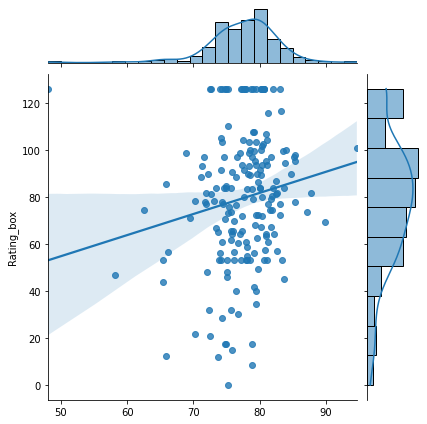

In [32]:
preds = lm.predict(X_te)

sns.jointplot(x=preds,y=y_test, kind='reg')

In [33]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Create the model
model = sm.OLS(y_train, sm.add_constant(X_tr)) 

#Fit
fit = model.fit()

#Print out summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Rating_box   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     3.130
Date:                Fri, 14 May 2021   Prob (F-statistic):            0.00104
Time:                        03:32:22   Log-Likelihood:                -3602.6
No. Observations:                 757   AIC:                             7225.
Df Residuals:                     747   BIC:                             7271.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.6599      1.033     75.211      0.000      75.633      79.687
x1            -1.7006      1.051     -1.618      0.106      -3.764       0.362
x2            -1.6180      1.053     -1.537      0.125      -3.685       0.449
x3            -0.1747      1.071     -0.163      0.871      -2.278       1.928
x4             0.7973      1.037      0.769      0.442      -1.239       2.833
x5            -3.1916      1.365     -2.338      0.020      -5.872      -0.511
x6            -1.5817      1.217     -1.300      0.194      -3.970       0.807
x7             4.1677      1.286      3.240      0.001       1.642       6.693
x8            -2.2620      1.183     -1.912      0.056      -4.584       0.060
x9             2.4246      1.192      2.035      0.042       0.085       4.764
==============================================================================
Omnibus:                        4.260   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                3.307
Skew:                          -0.013   Prob(JB):                        0.191
Kurtosis:                       2.677   Cond. No.                         2.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
import scipy.stats as stats
def diagnostic_plots(y_pred, y_true, resid):
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    g1 = sns.regplot(x=y_pred, y=y_true, ci=False, fit_reg=False, line_kws={'color': 'blue'}, ax=axes[0], scatter_kws={'s': 5})
    g1.set_xlabel('Predicted Target')
    g1.set_ylabel('True Target')
    g1.plot(y_true, y_true, '--', color='gray')

    g2 = sns.regplot(x=y_pred, y=resid, lowess=True, ax=axes[1], line_kws={'color': 'red'}, scatter_kws={'s': 5})
    g2.set_xlabel('Predicted Target')
    g2.set_ylabel('Residual')
    g2.axhline(y=0, color='gray', linestyle='--')

    stats.probplot(resid, dist="norm", plot=axes[2])

    fig.suptitle('Diagnostic Plots');
    fig.tight_layout();

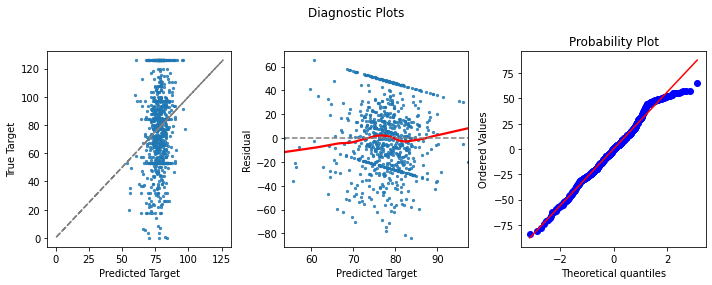

In [35]:
diagnostic_plots(fit.fittedvalues, y_train, fit.resid)

from sklearn.model_selection import cross_val_score
lm = LinearRegression()

cross_val_score(lm, X, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

### Polynomial Regression with Lasso regularization

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
# Split into train, val, and test
X, X_test, y, y_test = train_test_split(Recipes_df_new [['Prep_Time', 'Cook_Time', 'Yield', 'RatingCount',
                                                       'Protein(gms)', 'Carbs(gms)','fat(gms)', 
                                                        'cholestrol(gms)', 'sodium(gms)', 'Calories' ]] , 
                                        Recipes_df_new['Rating_box'], test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=40)

In [38]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
lr_poly.score(X_train_poly,y_train)

0.14433206364598494

In [39]:
# Score on validation set
lr_poly.score(X_val_poly, y_val)

-0.10742558482346665

In [40]:
## Polynomial with Lasso to reduce overfitting 

In [41]:
from sklearn.linear_model import LassoCV, RidgeCV

In [42]:
# Don't forget to standard scale your data for regularized regression
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)

# Apply the same scaler to val set
X_val_poly_scaled = scaler.transform(X_val_poly)

# Fit a LASSO model using polynomial features
lasso = LassoCV(max_iter=1e5)
lasso.fit(X_train_poly_scaled,y_train)
lasso.score(X_train_poly_scaled,y_train)

0.07252363706373843

In [43]:
lasso.score(X_val_poly_scaled, y_val)

0.022314022687140778

In [44]:
# Fit a LASSO model on full dataset using scaled, polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

lasso = LassoCV(max_iter=1e5)
lasso.fit(X_poly_scaled,y)

# Apply the same polynomial and scaling transformations to test set, then score
X_test_poly = poly.transform(X_test)
X_test_poly_scaled = scaler.transform(X_test_poly)

lasso.score(X_test_poly_scaled, y_test)

-0.01473605020433122

## Cross Validation

In [45]:
from sklearn.model_selection import KFold

In [46]:
X = Recipes_df_new [['Prep_Time', 'Cook_Time', 'Yield', 'RatingCount',
                    'Protein(gms)', 'Carbs(gms)','fat(gms)', 
                     'cholestrol(gms)', 'sodium(gms)', 'Calories'  ]] 

# Target
y = Recipes_df_new['Rating_box']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [47]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm, cv_lm_poly_lasso = [], []

for train_ind, val_ind in kf.split(X,y):
    
    X_train_cv, y_train_cv = X[train_ind], y[train_ind]
    X_val_cv, y_val_cv = X[val_ind], y[val_ind] 
    
    #linear regression
    lm = LinearRegression()
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_cv)
    X_val_scaled = scaler.transform(X_val_cv)
    
    lm.fit(X_train_scaled, y_train_cv)
    cv_lm.append(lm.score(X_val_scaled, y_val_cv).round(3))
    
    #Poly regression
    #lm_poly = LinearRegression()
    poly = PolynomialFeatures(degree=2)
    X_train_p = poly.fit_transform(X_train_cv)
    X_train_poly_scaled = scaler.fit_transform(X_train_p)
    X_val_p = poly.transform(X_val_cv)
    X_val_poly_scaled = scaler.transform(X_val_p)
    lasso = LassoCV(max_iter=1e5)
    lasso.fit(X_train_poly_scaled,y_train_cv)
    #lm_poly.fit(X_train_p,y_train_cv)
    cv_lm_poly_lasso.append(lasso.score(X_val_poly_scaled,y_val_cv).round(3))
    
print(f'Linear Regression scores: \t{cv_lm}')
print(f'Polynomial Regression with Lasso scores: \t{cv_lm_poly_lasso} \n')

print(f'Linear Regression cv r^2: {np.mean(cv_lm):.3f} +- {np.std(cv_lm):.3f}')
print(f'Polynomial Regression with Lasso mean cv r^2: {np.mean(cv_lm_poly_lasso):.3f} +- {np.std(cv_lm_poly_lasso):.3f}')
    


Linear Regression scores: 	[0.014, 0.012, -0.04, 0.013, 0.01]
Polynomial Regression with Lasso scores: 	[0.02, -0.017, -0.021, 0.0, -0.024] 

Linear Regression cv r^2: 0.002 +- 0.021
Polynomial Regression with Lasso mean cv r^2: -0.008 +- 0.016
